**House Grade Prediction**

Find The Best House : The 1234ABC Realtors limited is in great losses due to the autmoation in the industry and the new innovations and players in the real estate market . So they have hired a Data Science Team to give them a business solution so as to help regain their place in the market. In order to do that , the group thought of a compiled way of grading the houses inorder from a to e with respect to different aspects in mind. This would help them to rate the houses as well as different areas as well. So gear up and help the realtors get back their place in the market.

Objective of the problem: The objective of the problem is to predict values “Grade” attribute from the given features of the Test data. Please view the sample submission file to understand how the submission file is to be written. Please upload the submission file to get a score.

-> The predictions are to be written to a CSV file along with ID which is the unique identifier for each tuple.
-> Please upload the submission file to get a score.
-> Please note that the training data is only for creating your data model and all predictions are to be made as per serial numbers on the test file.

Description of files: -

-> Training File: All features including the target would be present in this file. Machine learning model would trained using this file. This file is to be used for training and validation.
-> Test File: This file contains all features, but the target variable. Prediction is to be made for all tuples in the test
file. The predicted values are to be written to a CSV file along with ID and uploaded.
-> Sample Submission: Sample submission is an example of how the actual submission file should be like

Description of the data attributes is as below:

• Area(total): Total area of the plot
• Trooms: Total Number of rooms in the house
• Nbedrooms: Number of bedroom in the house
• Nbwashrooms: Number of washroom attached with bedroom
• Twashrooms: total number of washroom in the house.
• Roof: Does the house has roof(yes or no)
• Roof(Area): Total area of the terrace
• Lawn(Area): Area of the lawn including garden and parking
• Nfloor: Number of floors in the house
• API: Air purity index api is in percentage for example if api is 85 it means its 85% of the standard api for the city.
• ANB: Amenities near by amenities like hospital, park , multiplex , malls etc within 2 miles.
• Expected price: price expected by seller.
• Grade: Grade provided by company that depends on the condition and other features mentioned in the data. *(Note A is best garde and E is worst.)*

Evaluation: The metric of evaluation for this prediction problem is Accuracy.

Submission Limit: The submission limit for each team for each question is 15. Please note that individual submission limits would be shown to individuals. Though individual submissions are shown to individuals, if any other team mate make a submission, the team submission counter would increase.

# Importing necessart libraries

In [1]:
import pandas as pd      
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option('display.max_columns',None)
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Loading the Dataset

In [2]:
df = pd.read_csv("TRAINING_.csv")

In [3]:
df

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED
0,1,305,8.0,2.0,1.0,3.0,NO,0.0,76.0,2,63.0,4,D,3826$
1,2,344,6.0,7.0,7.0,8.0,no,0.0,83.0,7,97.0,1,B,4458$
2,3,294,8.0,4.0,3.0,4.0,yes,97.0,78.0,1,88.0,4,C,4199$
3,4,328,5.0,4.0,2.0,4.0,NO,0.0,91.0,5,86.0,1,D,3462$
4,5,295,9.0,5.0,3.0,5.0,NaN,NaN,97.0,4,93.0,3,C,4543$
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,6996,306,8.0,2.0,1.0,3.0,NaN,NaN,78.0,1,73.0,5,D,3717$
6996,6997,341,5.0,3.0,2.0,4.0,YES,100.0,72.0,4,76.0,4,D,3339$
6997,6998,306,6.0,4.0,2.0,4.0,yes,83.0,80.0,4,96.0,4,D,3829$
6998,6999,338,8.0,7.0,6.0,7.0,NO,0.0,95.0,4,84.0,1,B,4488$


# Shape of the Data

In [4]:
df.shape

(7000, 14)

In [5]:
df.head(10)

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED
0,1,305,8.0,2.0,1.0,3.0,NO,0.0,76.0,2,63.0,4,D,3826$
1,2,344,6.0,7.0,7.0,8.0,no,0.0,83.0,7,97.0,1,B,4458$
2,3,294,8.0,4.0,3.0,4.0,yes,97.0,78.0,1,88.0,4,C,4199$
3,4,328,5.0,4.0,2.0,4.0,NO,0.0,91.0,5,86.0,1,D,3462$
4,5,295,9.0,5.0,3.0,5.0,NaN,NaN,97.0,4,93.0,3,C,4543$
5,6,335,8.0,6.0,5.0,7.0,NO,0.0,99.0,6,75.0,1,C,4324$
6,7,322,9.0,4.0,1.0,3.0,YES,112.0,78.0,4,65.0,4,C,4221$
7,8,346,8.0,3.0,2.0,4.0,NO,0.0,87.0,2,72.0,4,D,3438$
8,9,298,5.0,5.0,4.0,6.0,NaN,NaN,103.0,6,62.0,2,D,3357$
9,10,329,5.0,7.0,7.0,8.0,NaN,NaN,79.0,6,67.0,3,B,4073$


In [6]:
df.tail(10)

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED
6990,6991,296,8.0,8.0,5.0,7.0,YES,92.0,96.0,5,86.0,6,B,4955$
6991,6992,303,9.0,6.0,6.0,7.0,YES,116.0,103.0,5,97.0,3,B,4491$
6992,6993,295,8.0,4.0,1.0,3.0,no,0.0,105.0,1,81.0,4,D,3198$
6993,6994,335,6.0,3.0,2.0,3.0,YES,93.0,102.0,1,59.0,5,D,3198$
6994,6995,314,7.0,7.0,5.0,6.0,yes,99.0,72.0,5,98.0,3,C,4217$
6995,6996,306,8.0,2.0,1.0,3.0,NaN,NaN,78.0,1,73.0,5,D,3717$
6996,6997,341,5.0,3.0,2.0,4.0,YES,100.0,72.0,4,76.0,4,D,3339$
6997,6998,306,6.0,4.0,2.0,4.0,yes,83.0,80.0,4,96.0,4,D,3829$
6998,6999,338,8.0,7.0,6.0,7.0,NO,0.0,95.0,4,84.0,1,B,4488$
6999,7000,314,5.0,6.0,4.0,6.0,yes,109.0,80.0,4,96.0,2,C,3418$


# Checking the datatypes of each features

In [7]:
df.dtypes

id               int64
Area(total)      int64
Troom          float64
Nbedrooms      float64
Nbwashrooms    float64
Twashrooms     float64
roof            object
Roof(Area)     float64
Lawn(Area)     float64
Nfloors          int64
API            float64
ANB              int64
Grade           object
EXPECTED        object
dtype: object

# Now will check for duplicated values

In [8]:
df[df.duplicated()]

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED


# Checking the null values

In [9]:
df.isnull().sum()

id                0
Area(total)       0
Troom             2
Nbedrooms         3
Nbwashrooms       2
Twashrooms        1
roof           1353
Roof(Area)     1353
Lawn(Area)        2
Nfloors           0
API               1
ANB               0
Grade             0
EXPECTED          0
dtype: int64

In [10]:
# df = df.dropna()

# Replacing the null Values with mean

In [11]:
columns_to_replace = ['Troom', 'Nbedrooms', 'Nbwashrooms', 'Roof(Area)', 'Lawn(Area)','Twashrooms', 'API']

# Replace null values with the mean of each column
for column in columns_to_replace:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)

# Now, df contains null values replaced with the mean of each respective column
print(df)

        id  Area(total)  Troom  Nbedrooms  Nbwashrooms  Twashrooms roof  \
0        1          305    8.0        2.0          1.0         3.0   NO   
1        2          344    6.0        7.0          7.0         8.0   no   
2        3          294    8.0        4.0          3.0         4.0  yes   
3        4          328    5.0        4.0          2.0         4.0   NO   
4        5          295    9.0        5.0          3.0         5.0  NaN   
...    ...          ...    ...        ...          ...         ...  ...   
6995  6996          306    8.0        2.0          1.0         3.0  NaN   
6996  6997          341    5.0        3.0          2.0         4.0  YES   
6997  6998          306    6.0        4.0          2.0         4.0  yes   
6998  6999          338    8.0        7.0          6.0         7.0   NO   
6999  7000          314    5.0        6.0          4.0         6.0  yes   

      Roof(Area)  Lawn(Area)  Nfloors   API  ANB Grade EXPECTED  
0       0.000000        76.0     

In [12]:
df.loc[(df["Roof(Area)"] != 0) & df["roof"].isna(), "roof"] = "yes"
df.loc[(df["Roof(Area)"] == 0) & df["roof"].isna(), "roof"] = "no"

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           7000 non-null   int64  
 1   Area(total)  7000 non-null   int64  
 2   Troom        7000 non-null   float64
 3   Nbedrooms    7000 non-null   float64
 4   Nbwashrooms  7000 non-null   float64
 5   Twashrooms   7000 non-null   float64
 6   roof         7000 non-null   object 
 7   Roof(Area)   7000 non-null   float64
 8   Lawn(Area)   7000 non-null   float64
 9   Nfloors      7000 non-null   int64  
 10  API          7000 non-null   float64
 11  ANB          7000 non-null   int64  
 12  Grade        7000 non-null   object 
 13  EXPECTED     7000 non-null   object 
dtypes: float64(7), int64(4), object(3)
memory usage: 765.8+ KB


In [14]:
df.isnull().sum()

id             0
Area(total)    0
Troom          0
Nbedrooms      0
Nbwashrooms    0
Twashrooms     0
roof           0
Roof(Area)     0
Lawn(Area)     0
Nfloors        0
API            0
ANB            0
Grade          0
EXPECTED       0
dtype: int64

In [15]:
df.describe()

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,3500.500000,325.225571,7.012146,4.992568,4.004716,5.501357,47.202763,89.957988,4.509429,78.975711,3.494714
std,2020.870275,20.550583,1.419858,1.653064,1.596755,1.509021,43.835893,11.811031,1.831187,11.851596,1.700449
min,1.000000,290.000000,5.000000,2.000000,1.000000,3.000000,0.000000,70.000000,1.000000,59.000000,1.000000
25%,1750.750000,307.000000,6.000000,4.000000,3.000000,4.000000,0.000000,80.000000,3.000000,69.000000,2.000000
50%,3500.500000,326.000000,7.000000,5.000000,4.000000,5.000000,47.202763,90.000000,5.000000,79.000000,3.000000
75%,5250.250000,343.000000,8.000000,6.000000,5.000000,7.000000,89.000000,100.000000,6.000000,89.000000,5.000000
max,7000.000000,360.000000,9.000000,8.000000,7.000000,8.000000,120.000000,110.000000,8.000000,99.000000,6.000000


In [16]:
df.columns

Index(['id', 'Area(total)', 'Troom', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'roof', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB', 'Grade',
       'EXPECTED'],
      dtype='object')

# Checking the unique values of the columns

In [17]:
for i in df.columns:
    print('Feature =',i,'\n')
    print(df[i].unique())
    print('No of unique values = ',df[i].nunique(),'\n')

Feature = id 

[   1    2    3 ... 6998 6999 7000]
No of unique values =  7000 

Feature = Area(total) 

[305 344 294 328 295 335 322 346 298 329 304 307 316 351 312 318 359 339
 291 313 348 349 357 336 301 311 309 337 334 360 347 319 356 315 355 317
 302 296 343 330 338 290 321 333 352 350 354 306 342 324 331 293 320 303
 300 353 332 297 326 323 327 340 292 358 314 299 308 325 310 341 345]
No of unique values =  71 

Feature = Troom 

[8.         6.         5.         9.         7.         7.01214633]
No of unique values =  6 

Feature = Nbedrooms 

[2.         7.         4.         5.         6.         3.
 8.         4.99256824]
No of unique values =  8 

Feature = Nbwashrooms 

[1.         7.         3.         2.         5.         4.
 6.         4.00471563]
No of unique values =  8 

Feature = Twashrooms 

[3.         8.         4.         5.         7.         6.
 5.50135734]
No of unique values =  7 

Feature = roof 

['NO' 'no' 'yes' 'YES']
No of unique values =  4 

Feature =

In [18]:
df

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED
0,1,305,8.0,2.0,1.0,3.0,NO,0.000000,76.0,2,63.0,4,D,3826$
1,2,344,6.0,7.0,7.0,8.0,no,0.000000,83.0,7,97.0,1,B,4458$
2,3,294,8.0,4.0,3.0,4.0,yes,97.000000,78.0,1,88.0,4,C,4199$
3,4,328,5.0,4.0,2.0,4.0,NO,0.000000,91.0,5,86.0,1,D,3462$
4,5,295,9.0,5.0,3.0,5.0,yes,47.202763,97.0,4,93.0,3,C,4543$
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,6996,306,8.0,2.0,1.0,3.0,yes,47.202763,78.0,1,73.0,5,D,3717$
6996,6997,341,5.0,3.0,2.0,4.0,YES,100.000000,72.0,4,76.0,4,D,3339$
6997,6998,306,6.0,4.0,2.0,4.0,yes,83.000000,80.0,4,96.0,4,D,3829$
6998,6999,338,8.0,7.0,6.0,7.0,NO,0.000000,95.0,4,84.0,1,B,4488$


# Correcting the roof column values

In [19]:
df["roof"].unique()

array(['NO', 'no', 'yes', 'YES'], dtype=object)

In [20]:
df['roof'] = df['roof'].str.lower()

In [21]:
df["roof"].unique()

array(['no', 'yes'], dtype=object)

In [22]:
df.shape

(7000, 14)

# Converting the Object into string

In [23]:
df['EXPECTED'] = df['EXPECTED'].str.replace('$', '', regex=False).astype(int)

In [24]:
df.isnull().sum()

id             0
Area(total)    0
Troom          0
Nbedrooms      0
Nbwashrooms    0
Twashrooms     0
roof           0
Roof(Area)     0
Lawn(Area)     0
Nfloors        0
API            0
ANB            0
Grade          0
EXPECTED       0
dtype: int64

# Label Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to the specified columns
df["roof"] = label_encoder.fit_transform(df["roof"])


In [26]:
grade_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}

# Use the map() function to replace letter grades with numerical values
df['Grade'] = df['Grade'].map(grade_mapping)

In [27]:
df

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED
0,1,305,8.0,2.0,1.0,3.0,0,0.000000,76.0,2,63.0,4,3,3826
1,2,344,6.0,7.0,7.0,8.0,0,0.000000,83.0,7,97.0,1,1,4458
2,3,294,8.0,4.0,3.0,4.0,1,97.000000,78.0,1,88.0,4,2,4199
3,4,328,5.0,4.0,2.0,4.0,0,0.000000,91.0,5,86.0,1,3,3462
4,5,295,9.0,5.0,3.0,5.0,1,47.202763,97.0,4,93.0,3,2,4543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,6996,306,8.0,2.0,1.0,3.0,1,47.202763,78.0,1,73.0,5,3,3717
6996,6997,341,5.0,3.0,2.0,4.0,1,100.000000,72.0,4,76.0,4,3,3339
6997,6998,306,6.0,4.0,2.0,4.0,1,83.000000,80.0,4,96.0,4,3,3829
6998,6999,338,8.0,7.0,6.0,7.0,0,0.000000,95.0,4,84.0,1,1,4488


In [28]:
df["Grade"].unique()

array([3, 1, 2, 0, 4], dtype=int64)

# Droping the Id column

In [29]:
df.drop(columns=['id'], inplace=True)

# Finding the outliers

In [30]:
df.columns

Index(['Area(total)', 'Troom', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'roof', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB', 'Grade',
       'EXPECTED'],
      dtype='object')

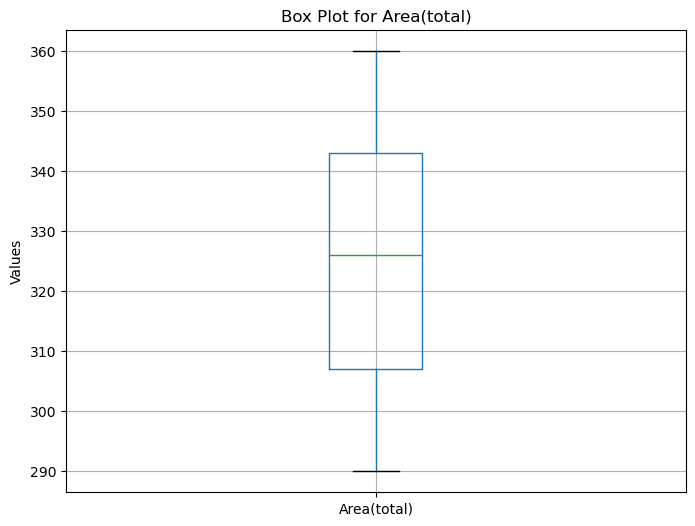

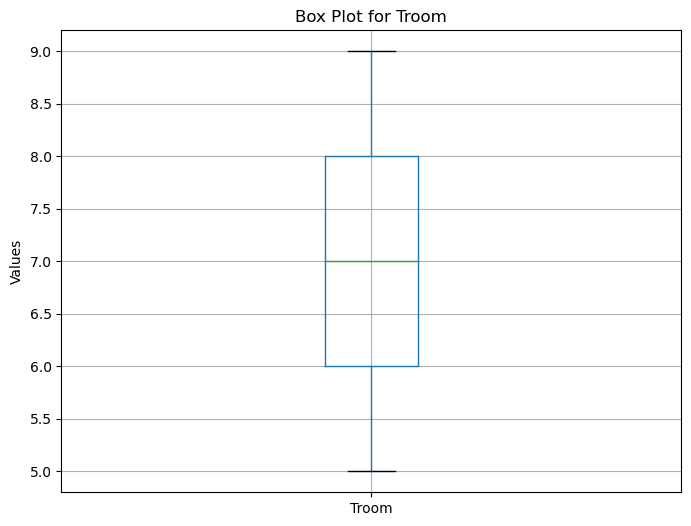

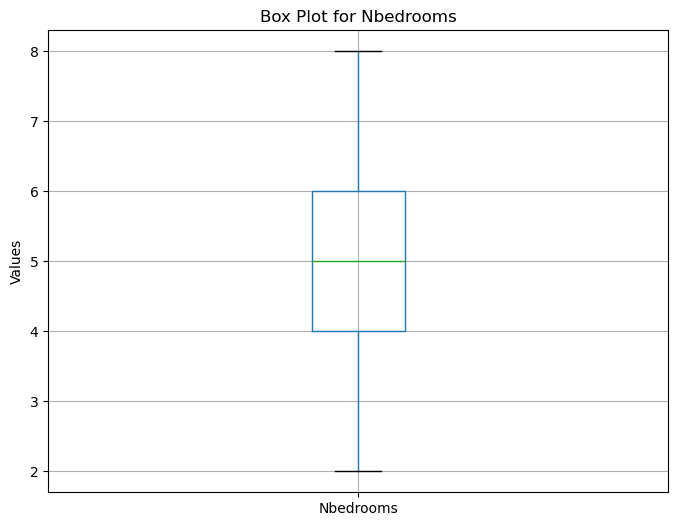

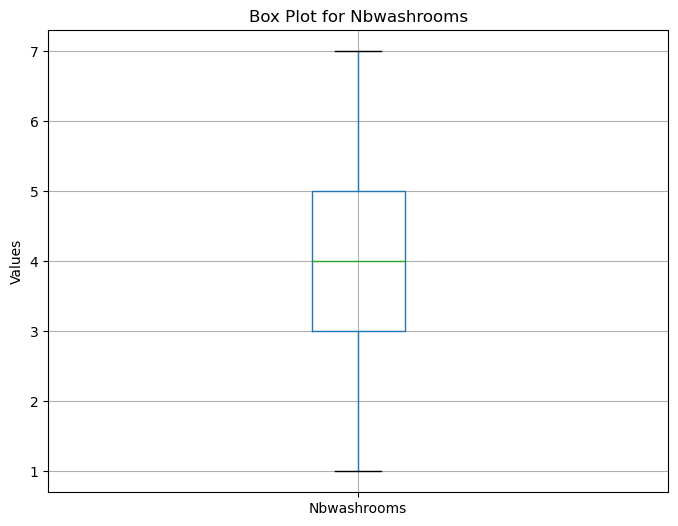

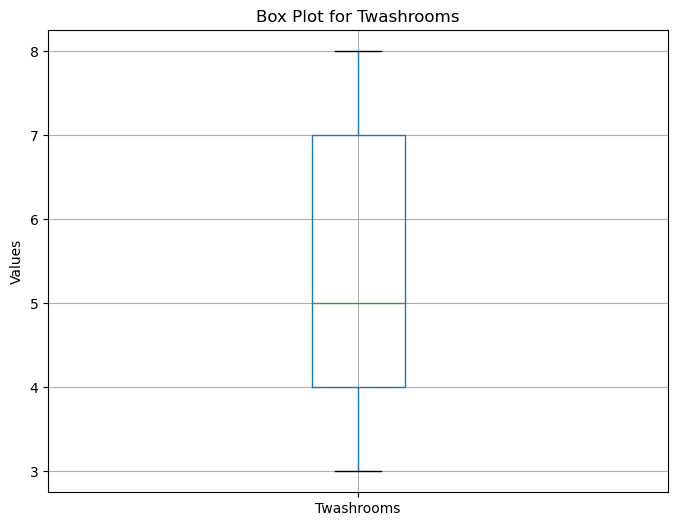

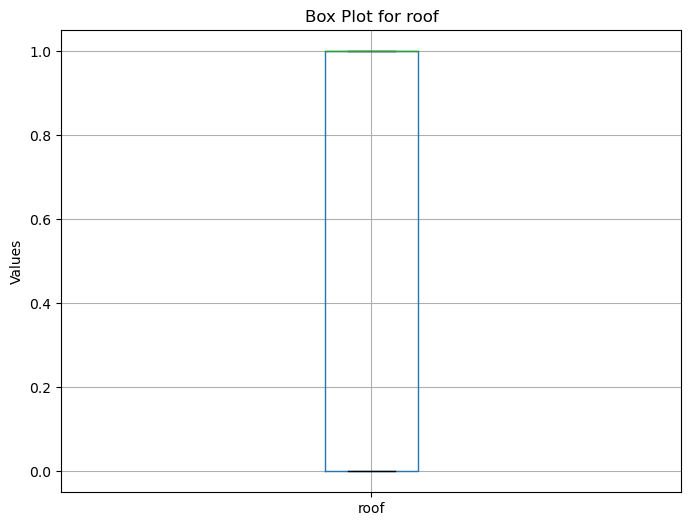

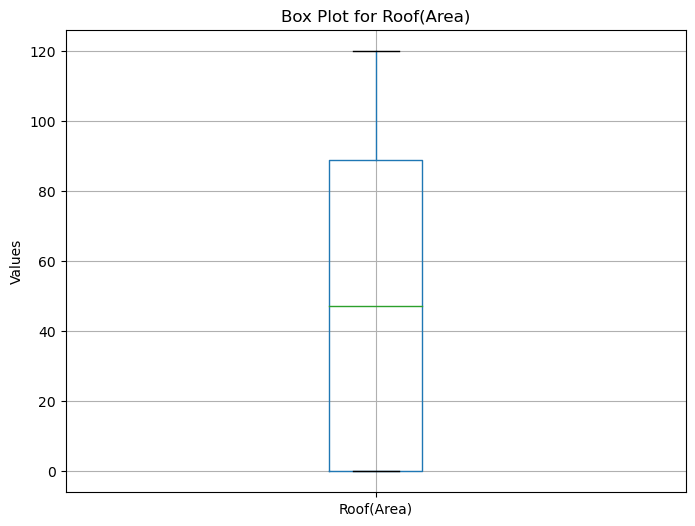

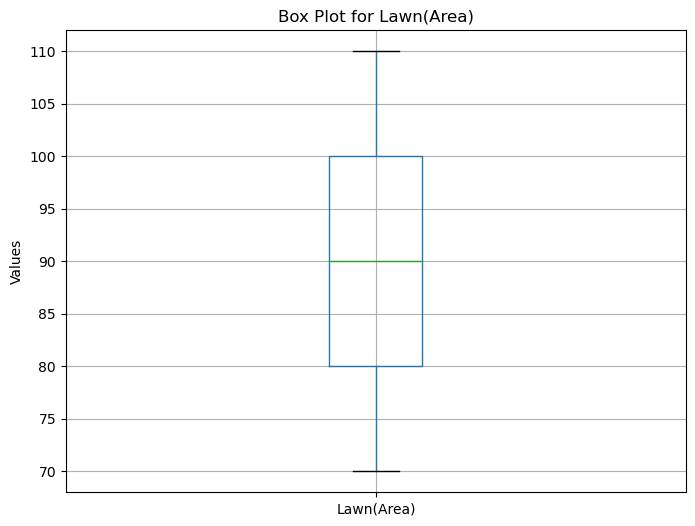

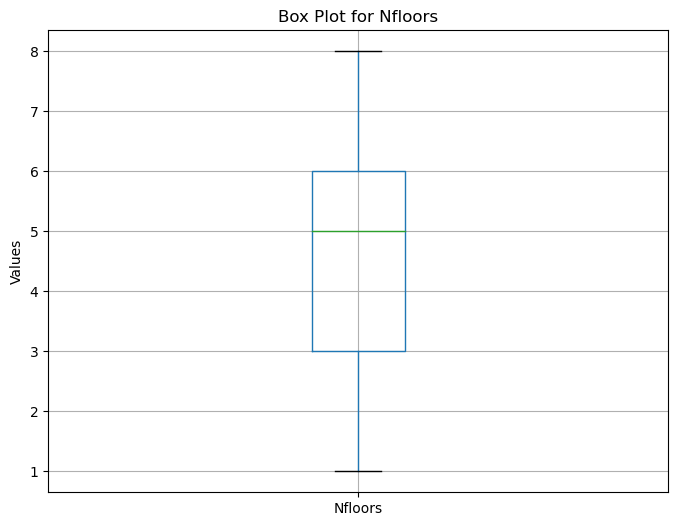

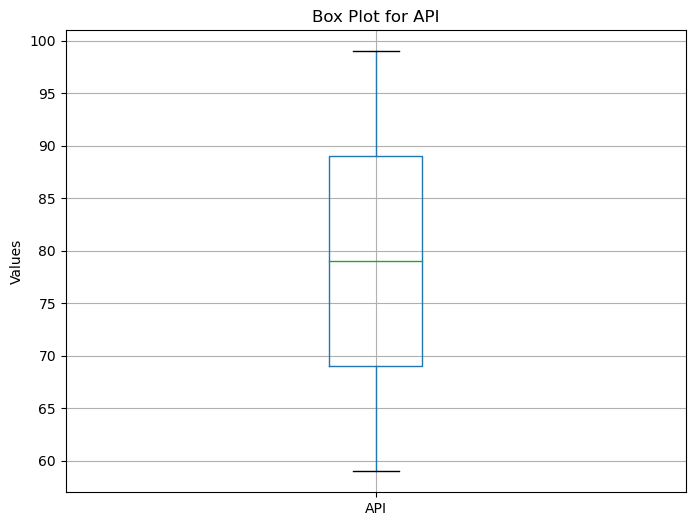

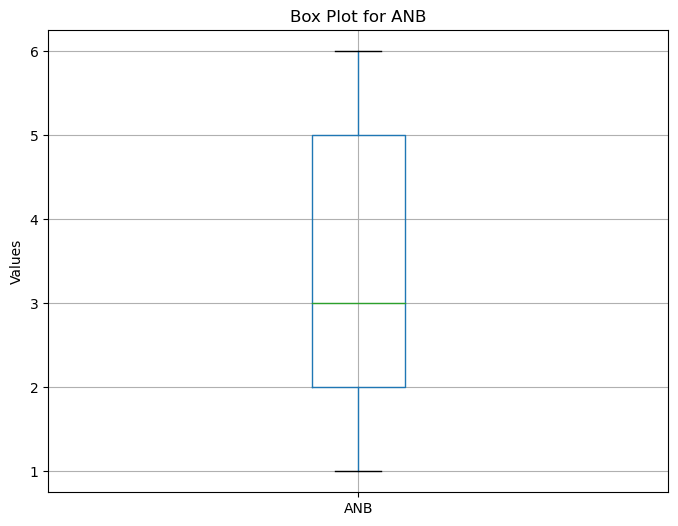

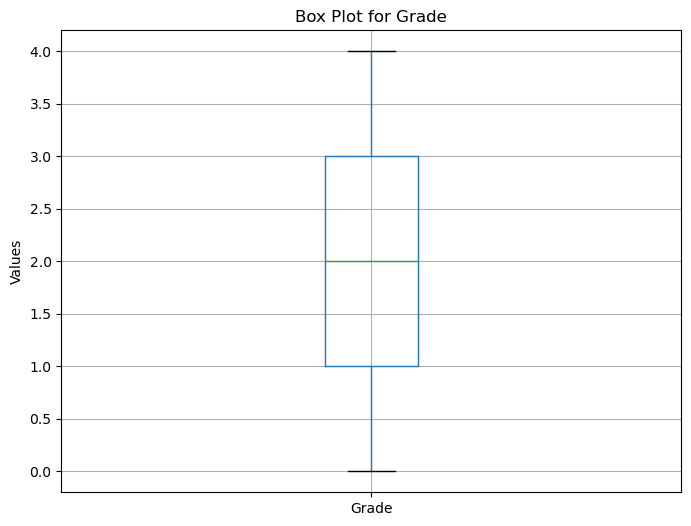

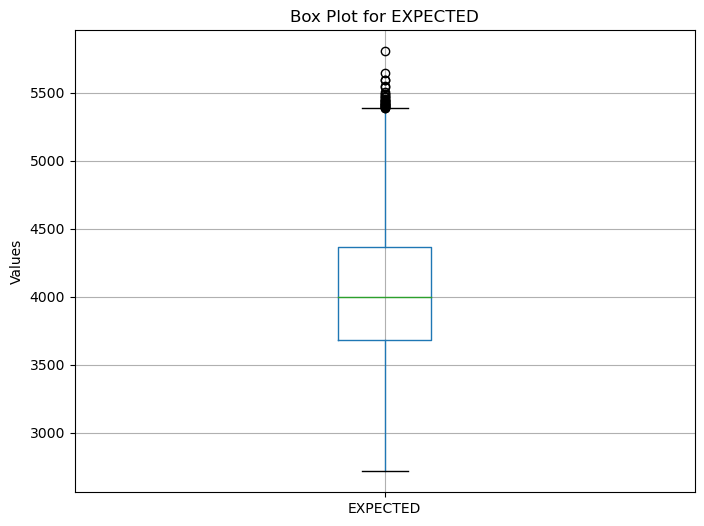

In [31]:
for column in df.columns:
    plt.figure(figsize=(8, 6))
    df.boxplot(column=[column])
    plt.title(f'Box Plot for {column}')
    plt.ylabel('Values')
    plt.show()

# Treating of Outliers

In [32]:
indices_to_drop = df[df.EXPECTED>5300].index

In [33]:
indices_to_drop

Int64Index([  20,  115,  251,  283,  300,  430,  530,  531,  578,  748, 1046,
            1151, 1178, 1436, 1460, 1672, 1680, 1940, 2002, 2114, 2770, 3349,
            3395, 3447, 3735, 3763, 3769, 4043, 4163, 4417, 4437, 4738, 4953,
            4960, 4991, 5090, 5114, 5126, 5337, 5393, 5456, 5833, 5976, 6045,
            6119, 6274, 6340, 6560, 6629, 6721, 6772, 6779, 6941],
           dtype='int64')

In [34]:
df = df.drop(indices_to_drop)

In [35]:
df=df.reset_index(drop=True)

In [36]:
df.shape

(6947, 13)

Text(0.5, 1.0, 'Boxplot of EXPECTED PRICES ')

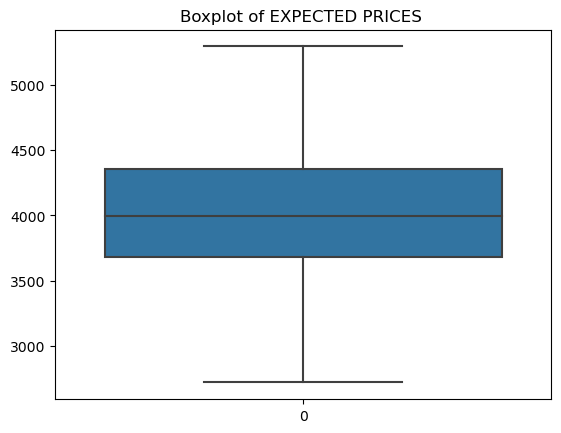

In [37]:
sns.boxplot(df.EXPECTED)
plt.title("Boxplot of EXPECTED PRICES ")

In [38]:
df["EXPECTED"].unique()

array([3826, 4458, 4199, ..., 4643, 4955, 3198])

# Spliting the data into X and y

In [39]:
X=df.drop("Grade",axis=1)
X.head(2)

,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED
0,305,8.0,2.0,1.0,3.0,0,0.0,76.0,2,63.0,4,3826
1,344,6.0,7.0,7.0,8.0,0,0.0,83.0,7,97.0,1,4458


In [40]:
y=df['Grade']
y.head(2)

0    3
1    1
Name: Grade, dtype: int64

# Using MinMaxScaler

In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

In [42]:
# load the library for spliting 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test,=train_test_split(X_scaled,y,test_size=0.20,random_state=1)

In [43]:
# dimension of the datasets
print('x_train =',X_train.shape)
print('x_test =',X_test.shape)
print('y_train =',y_train.shape)
print('y_test =',y_test.shape)

x_train = (5557, 12)
x_test = (1390, 12)
y_train = (5557,)
y_test = (1390,)


# Random Forest Classifier Model

In [44]:
model1 = RandomForestClassifier(n_estimators=100,random_state=0)
model1.fit(X_train,y_train)
y_train_pred=model1.predict(X_train)
y_test_pred=model1.predict(X_test)

In [45]:
y_test_predict = model1.predict(X_test)


In [46]:
accuracy =  accuracy_score(y_test,y_test_predict)
report = classification_report(y_test,y_test_predict)

In [47]:
print(accuracy)


0.8812949640287769


In [48]:
print(report)

              precision    recall  f1-score   support

           0       0.94      0.54      0.68        82
           1       0.79      0.88      0.83       285
           2       0.88      0.92      0.90       589
           3       0.94      0.91      0.92       428
           4       1.00      0.67      0.80         6

    accuracy                           0.88      1390
   macro avg       0.91      0.78      0.83      1390
weighted avg       0.89      0.88      0.88      1390



# Loading TEST Dataset 

In [49]:
df1= pd.read_csv("TEST_.csv")

In [50]:
df1

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED
0,1,348,9.0,5.0,3.0,5,NaN,NaN,84.0,5,91.0,6,4422$
1,2,311,6.0,5.0,5.0,6,NO,0.0,86.0,6,83.0,4,3432$
2,3,342,5.0,6.0,6.0,7,yes,120.0,85.0,4,95.0,5,4066$
3,4,329,7.0,7.0,4.0,6,NaN,NaN,105.0,5,97.0,6,4322$
4,5,307,6.0,2.0,3.0,4,no,0.0,76.0,2,64.0,4,3031$
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3294,3295,349,7.0,3.0,3.0,4,NaN,NaN,100.0,5,89.0,4,3858$
3295,3296,338,7.0,3.0,2.0,4,NO,0.0,87.0,3,75.0,6,3714$
3296,3297,307,8.0,4.0,5.0,6,yes,88.0,88.0,4,83.0,6,3824$
3297,3298,352,5.0,3.0,4.0,5,YES,88.0,100.0,2,99.0,4,3533$


In [51]:
df1.isnull().sum()

id               0
Area(total)      0
Troom            1
Nbedrooms        1
Nbwashrooms      1
Twashrooms       0
roof           653
Roof(Area)     653
Lawn(Area)       1
Nfloors          0
API              1
ANB              0
EXPECTED         0
dtype: int64

In [52]:
columns_to_replace = ['Troom', 'Nbedrooms', 'Nbwashrooms', 'Roof(Area)', 'Lawn(Area)', 'API']

# Replace null values with the mean of each column
for column in columns_to_replace:
    mean_value = df1[column].mean()
    df1[column].fillna(mean_value, inplace=True)

# Now, df contains null values replaced with the mean of each respective column
print(df1)

        id  Area(total)  Troom  Nbedrooms  Nbwashrooms  Twashrooms roof  \
0        1          348    9.0        5.0          3.0           5  NaN   
1        2          311    6.0        5.0          5.0           6   NO   
2        3          342    5.0        6.0          6.0           7  yes   
3        4          329    7.0        7.0          4.0           6  NaN   
4        5          307    6.0        2.0          3.0           4   no   
...    ...          ...    ...        ...          ...         ...  ...   
3294  3295          349    7.0        3.0          3.0           4  NaN   
3295  3296          338    7.0        3.0          2.0           4   NO   
3296  3297          307    8.0        4.0          5.0           6  yes   
3297  3298          352    5.0        3.0          4.0           5  YES   
3298  3299          329    5.0        3.0          1.0           3  yes   

      Roof(Area)  Lawn(Area)  Nfloors   API  ANB EXPECTED  
0      47.267196        84.0        5  

In [53]:
columns_to_replace = ["roof"]

# Replace null values with the mean of each column
for column in columns_to_replace:
    mean_value = df1[column].mode()
    df1[column].fillna(mean_value, inplace=True)

# Now, df contains null values replaced with the mean of each respective column
print(df1)

        id  Area(total)  Troom  Nbedrooms  Nbwashrooms  Twashrooms roof  \
0        1          348    9.0        5.0          3.0           5   NO   
1        2          311    6.0        5.0          5.0           6   NO   
2        3          342    5.0        6.0          6.0           7  yes   
3        4          329    7.0        7.0          4.0           6  NaN   
4        5          307    6.0        2.0          3.0           4   no   
...    ...          ...    ...        ...          ...         ...  ...   
3294  3295          349    7.0        3.0          3.0           4  NaN   
3295  3296          338    7.0        3.0          2.0           4   NO   
3296  3297          307    8.0        4.0          5.0           6  yes   
3297  3298          352    5.0        3.0          4.0           5  YES   
3298  3299          329    5.0        3.0          1.0           3  yes   

      Roof(Area)  Lawn(Area)  Nfloors   API  ANB EXPECTED  
0      47.267196        84.0        5  

In [54]:
df1.isnull().sum()

id               0
Area(total)      0
Troom            0
Nbedrooms        0
Nbwashrooms      0
Twashrooms       0
roof           652
Roof(Area)       0
Lawn(Area)       0
Nfloors          0
API              0
ANB              0
EXPECTED         0
dtype: int64

In [55]:
for i in df.columns:
    print('Feature =',i,'\n')
    print(df[i].unique())
    print('No of unique values = ',df[i].nunique(),'\n')

Feature = Area(total) 

[305 344 294 328 295 335 322 346 298 329 304 307 316 351 312 318 359 339
 291 313 348 349 357 336 301 311 309 337 334 360 347 319 356 315 355 317
 302 296 343 330 338 290 321 333 352 350 354 306 342 324 331 293 320 303
 300 353 332 297 326 323 327 340 292 358 314 299 308 325 310 341 345]
No of unique values =  71 

Feature = Troom 

[8.         6.         5.         9.         7.         7.01214633]
No of unique values =  6 

Feature = Nbedrooms 

[2.         7.         4.         5.         6.         3.
 8.         4.99256824]
No of unique values =  8 

Feature = Nbwashrooms 

[1.         7.         3.         2.         5.         4.
 6.         4.00471563]
No of unique values =  8 

Feature = Twashrooms 

[3.         8.         4.         5.         7.         6.
 5.50135734]
No of unique values =  7 

Feature = roof 

[0 1]
No of unique values =  2 

Feature = Roof(Area) 

[  0.          97.          47.20276253 112.          83.
  72.          92.         

In [56]:
df1["roof"].unique()

array(['NO', 'yes', nan, 'no', 'YES'], dtype=object)

In [57]:
df1['roof'] = df1['roof'].str.lower()

In [58]:
df1.isnull().sum()

id               0
Area(total)      0
Troom            0
Nbedrooms        0
Nbwashrooms      0
Twashrooms       0
roof           652
Roof(Area)       0
Lawn(Area)       0
Nfloors          0
API              0
ANB              0
EXPECTED         0
dtype: int64

In [59]:
df1["roof"].unique()

array(['no', 'yes', nan], dtype=object)

In [60]:
mode_value=df1["roof"].mode()

df1['roof'].fillna(value=mode_value, inplace=True) 

In [61]:
df1["roof"].value_counts()

no     1341
yes    1306
Name: roof, dtype: int64

In [62]:
df1["roof"].isnull().sum()

652

In [63]:
df1

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED
0,1,348,9.0,5.0,3.0,5,no,47.267196,84.0,5,91.0,6,4422$
1,2,311,6.0,5.0,5.0,6,no,0.000000,86.0,6,83.0,4,3432$
2,3,342,5.0,6.0,6.0,7,yes,120.000000,85.0,4,95.0,5,4066$
3,4,329,7.0,7.0,4.0,6,NaN,47.267196,105.0,5,97.0,6,4322$
4,5,307,6.0,2.0,3.0,4,no,0.000000,76.0,2,64.0,4,3031$
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3294,3295,349,7.0,3.0,3.0,4,NaN,47.267196,100.0,5,89.0,4,3858$
3295,3296,338,7.0,3.0,2.0,4,no,0.000000,87.0,3,75.0,6,3714$
3296,3297,307,8.0,4.0,5.0,6,yes,88.000000,88.0,4,83.0,6,3824$
3297,3298,352,5.0,3.0,4.0,5,yes,88.000000,100.0,2,99.0,4,3533$


In [64]:
df1.loc[(df1["Roof(Area)"] != 0) & df1["roof"].isna(), "roof"] = "yes"
df1.loc[(df1["Roof(Area)"] == 0) & df1["roof"].isna(), "roof"] = "no"

In [65]:
df1

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED
0,1,348,9.0,5.0,3.0,5,no,47.267196,84.0,5,91.0,6,4422$
1,2,311,6.0,5.0,5.0,6,no,0.000000,86.0,6,83.0,4,3432$
2,3,342,5.0,6.0,6.0,7,yes,120.000000,85.0,4,95.0,5,4066$
3,4,329,7.0,7.0,4.0,6,yes,47.267196,105.0,5,97.0,6,4322$
4,5,307,6.0,2.0,3.0,4,no,0.000000,76.0,2,64.0,4,3031$
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3294,3295,349,7.0,3.0,3.0,4,yes,47.267196,100.0,5,89.0,4,3858$
3295,3296,338,7.0,3.0,2.0,4,no,0.000000,87.0,3,75.0,6,3714$
3296,3297,307,8.0,4.0,5.0,6,yes,88.000000,88.0,4,83.0,6,3824$
3297,3298,352,5.0,3.0,4.0,5,yes,88.000000,100.0,2,99.0,4,3533$


In [66]:
df1.isnull().sum()

id             0
Area(total)    0
Troom          0
Nbedrooms      0
Nbwashrooms    0
Twashrooms     0
roof           0
Roof(Area)     0
Lawn(Area)     0
Nfloors        0
API            0
ANB            0
EXPECTED       0
dtype: int64

In [67]:
df1['EXPECTED'] = df1['EXPECTED'].str.replace('$', '', regex=False).astype(int)

In [68]:
df1.head(1)

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED
0,1,348,9.0,5.0,3.0,5,no,47.267196,84.0,5,91.0,6,4422


In [69]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to the specified columns
df1["roof"] = label_encoder.fit_transform(df1["roof"])

In [70]:
df1

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED
0,1,348,9.0,5.0,3.0,5,0,47.267196,84.0,5,91.0,6,4422
1,2,311,6.0,5.0,5.0,6,0,0.000000,86.0,6,83.0,4,3432
2,3,342,5.0,6.0,6.0,7,1,120.000000,85.0,4,95.0,5,4066
3,4,329,7.0,7.0,4.0,6,1,47.267196,105.0,5,97.0,6,4322
4,5,307,6.0,2.0,3.0,4,0,0.000000,76.0,2,64.0,4,3031
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3294,3295,349,7.0,3.0,3.0,4,1,47.267196,100.0,5,89.0,4,3858
3295,3296,338,7.0,3.0,2.0,4,0,0.000000,87.0,3,75.0,6,3714
3296,3297,307,8.0,4.0,5.0,6,1,88.000000,88.0,4,83.0,6,3824
3297,3298,352,5.0,3.0,4.0,5,1,88.000000,100.0,2,99.0,4,3533


In [71]:
deep_copy_df = df1.copy(deep=True)

In [72]:
df1 = df1.drop(columns=['id'])

In [73]:
df1

,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED
0,348,9.0,5.0,3.0,5,0,47.267196,84.0,5,91.0,6,4422
1,311,6.0,5.0,5.0,6,0,0.000000,86.0,6,83.0,4,3432
2,342,5.0,6.0,6.0,7,1,120.000000,85.0,4,95.0,5,4066
3,329,7.0,7.0,4.0,6,1,47.267196,105.0,5,97.0,6,4322
4,307,6.0,2.0,3.0,4,0,0.000000,76.0,2,64.0,4,3031
...,...,...,...,...,...,...,...,...,...,...,...,...
3294,349,7.0,3.0,3.0,4,1,47.267196,100.0,5,89.0,4,3858
3295,338,7.0,3.0,2.0,4,0,0.000000,87.0,3,75.0,6,3714
3296,307,8.0,4.0,5.0,6,1,88.000000,88.0,4,83.0,6,3824
3297,352,5.0,3.0,4.0,5,1,88.000000,100.0,2,99.0,4,3533


In [74]:
X_predict_scaled = scaler.fit_transform(df1)

In [75]:
y_predict = model1.predict(X_predict_scaled)


In [76]:
y_predict

array([2, 3, 2, ..., 2, 3, 3], dtype=int64)

In [77]:
Grade = pd.DataFrame(y_predict)

In [78]:
Grade.value_counts()

2    1457
3    1103
1     640
0      90
4       9
dtype: int64

In [79]:
Grade = Grade.rename(columns={0: 'Grade'})

In [80]:
Grade

,Grade
0,2
1,3
2,2
3,2
4,3
...,...
3294,2
3295,3
3296,2
3297,3


In [81]:
deep_copy_df

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED
0,1,348,9.0,5.0,3.0,5,0,47.267196,84.0,5,91.0,6,4422
1,2,311,6.0,5.0,5.0,6,0,0.000000,86.0,6,83.0,4,3432
2,3,342,5.0,6.0,6.0,7,1,120.000000,85.0,4,95.0,5,4066
3,4,329,7.0,7.0,4.0,6,1,47.267196,105.0,5,97.0,6,4322
4,5,307,6.0,2.0,3.0,4,0,0.000000,76.0,2,64.0,4,3031
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3294,3295,349,7.0,3.0,3.0,4,1,47.267196,100.0,5,89.0,4,3858
3295,3296,338,7.0,3.0,2.0,4,0,0.000000,87.0,3,75.0,6,3714
3296,3297,307,8.0,4.0,5.0,6,1,88.000000,88.0,4,83.0,6,3824
3297,3298,352,5.0,3.0,4.0,5,1,88.000000,100.0,2,99.0,4,3533


In [82]:
result_df = deep_copy_df.join(Grade)

In [83]:
result_df

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED,Grade
0,1,348,9.0,5.0,3.0,5,0,47.267196,84.0,5,91.0,6,4422,2
1,2,311,6.0,5.0,5.0,6,0,0.000000,86.0,6,83.0,4,3432,3
2,3,342,5.0,6.0,6.0,7,1,120.000000,85.0,4,95.0,5,4066,2
3,4,329,7.0,7.0,4.0,6,1,47.267196,105.0,5,97.0,6,4322,2
4,5,307,6.0,2.0,3.0,4,0,0.000000,76.0,2,64.0,4,3031,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3294,3295,349,7.0,3.0,3.0,4,1,47.267196,100.0,5,89.0,4,3858,2
3295,3296,338,7.0,3.0,2.0,4,0,0.000000,87.0,3,75.0,6,3714,3
3296,3297,307,8.0,4.0,5.0,6,1,88.000000,88.0,4,83.0,6,3824,2
3297,3298,352,5.0,3.0,4.0,5,1,88.000000,100.0,2,99.0,4,3533,3


# Converting the Grade numerical into Categorical Values

In [84]:
grade_mapping = {0: "A", 1: "B", 2: "C", 3: "D", 4: "E"}

# Use the map() function to replace letter grades with numerical values
result_df['Grade'] = result_df['Grade'].map(grade_mapping)

# Exporting the DataFrame to CSV

In [88]:
import pandas as pd

# Assuming you have a DataFrame named df
# Specify the file path and name for the Excel file
file_path = r'C:\Users\vijay\Python\Hackoton\Imarticus-Bengaluru-PGDA32-VijayKumar_Metta.csv'  # Replace 'your_file_name.xlsx' with your desired file path and name

# Export the DataFrame to an Excel file
result_df.to_csv(file_path, index=False)  # Set index=False to exclude the DataFrame index
